### Importing the key Python libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

# 1. IMPORT & EXPLORE DATA

### Load the data

In [ ]:
fruit = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/fruit_data_with_colours.csv")

### Explore the data

In [ ]:
# Now that the dataset is loaded, let's check the data and it's features using the head command
fruit.head(10)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


### Determine the number of pieces of fruits(rows) and attributes(columns)

In [ ]:
fruit.shape


(59, 7)

### Determine the fruits within the data

In [ ]:
fruit.fruit_name.unique()


array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

### Determine the count of fruits within the data

In [ ]:
fruit.fruit_name.value_counts()

,count
fruit_name,
apple,19
orange,19
lemon,16
mandarin,5


# 2. DATA VISUALISATION

### Visualise the data

<ipython-input-8-a47f1228ac7d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(fruit['fruit_name'], label="Count", palette="Set3")


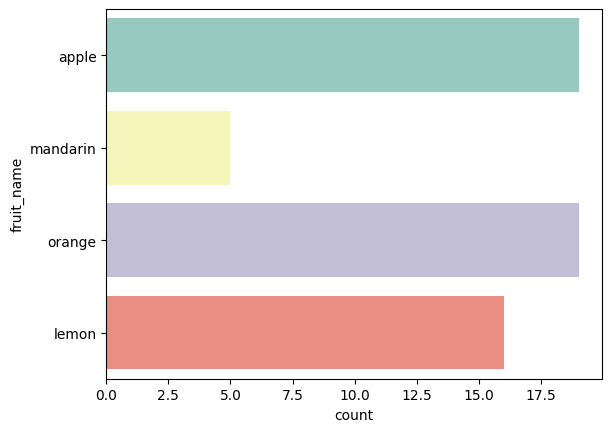

In [ ]:
# Since we know the type of fruit and count, we will visualise it using a simple bar graph

# Seaborn is a data visualization library in Python based on matplotlib
import seaborn as sns

sns.countplot(fruit['fruit_name'], label="Count", palette="Set3")
plt.show()

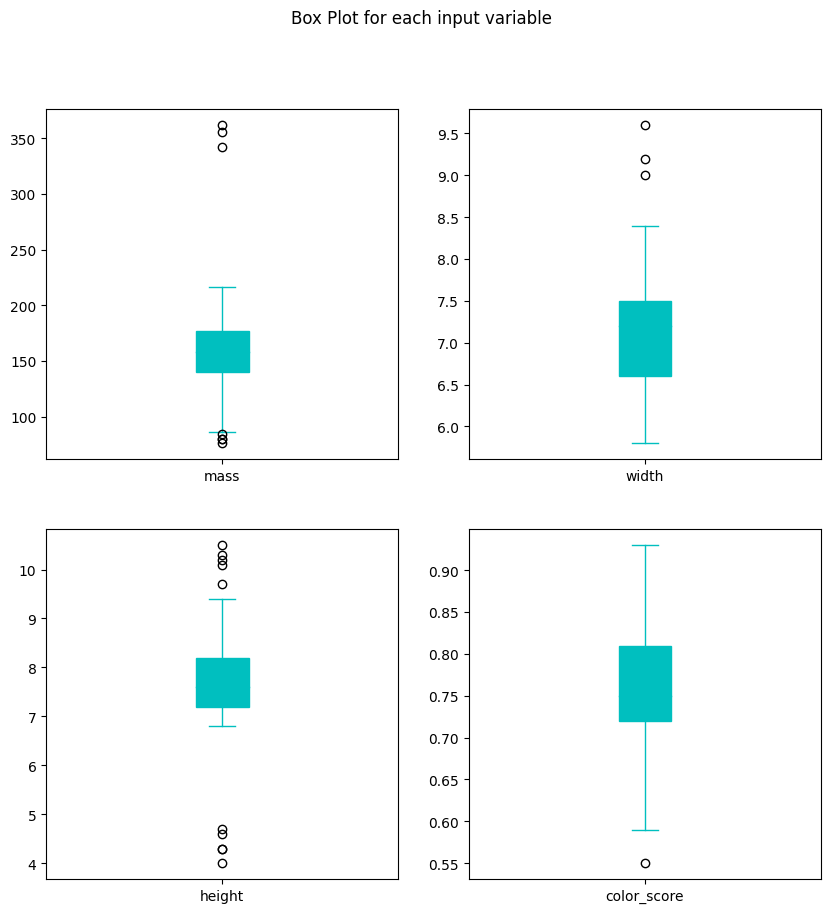

In [ ]:
fruit.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2),
                                        sharex=False, sharey=False, figsize=(10,10),
                                        color ='c', patch_artist=True)
plt.suptitle("Box Plot for each input variable")
plt.savefig('fruits_boxplot')
plt.show()

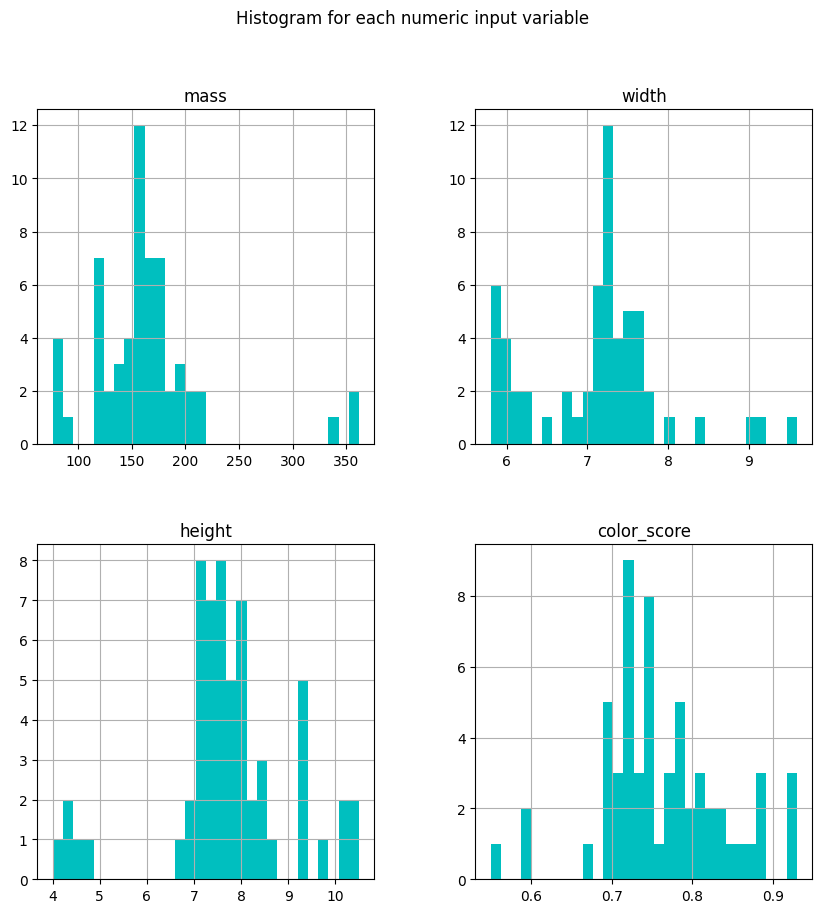

In [ ]:
# PyLab is a module that belongs to the Python mathematics library Matplotlib.
# PyLab combines the numerical module numpy with the graphical plotting module pyplot
import pylab as pl

# To create a histogram, we will use pandas hist() method.
fruit.drop('fruit_label', axis=1).hist(bins=30, figsize=(10,10), color = "c", ec = "m", lw=0)
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_histogram')
plt.show()

<ipython-input-12-d24d5ac9094a>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:96: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


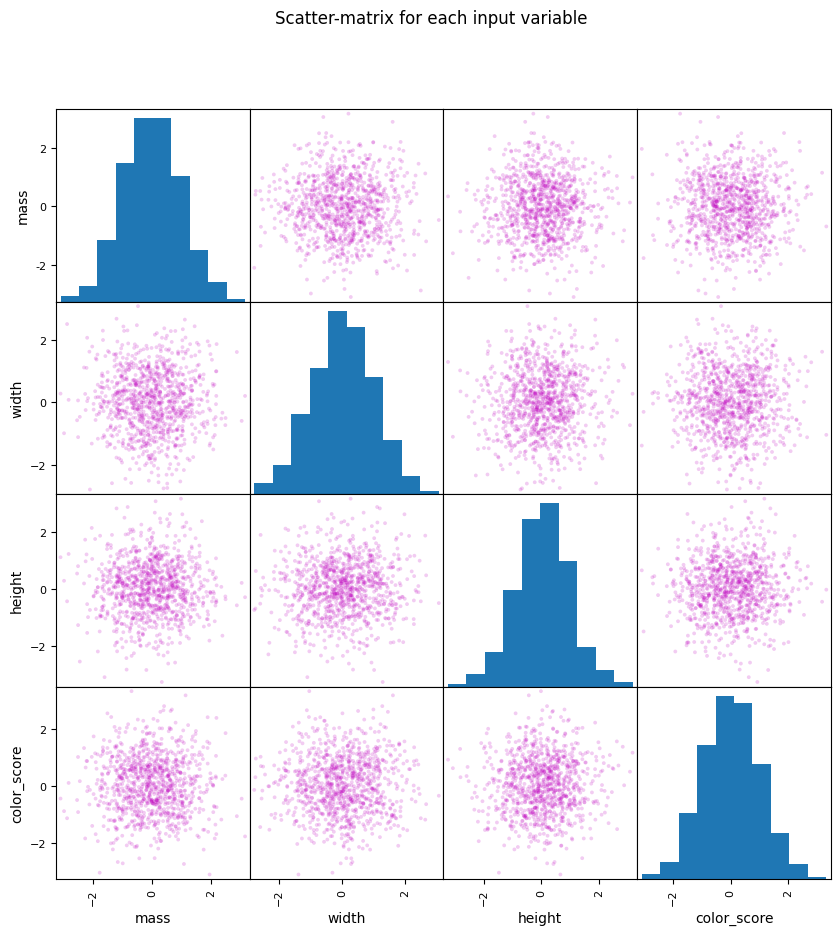

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
df = pd.DataFrame(np.random.randn(1000, 4), columns=['mass', 'width', 'height', 'color_score'])
scatter_matrix(df, alpha=0.2, cmap = cmap, figsize=(10,10), marker = '.', s=30, hist_kwds={'bins':10}, range_padding=0.05, color = 'm')
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruit_scatter_matrix')

# 3. K-Nearest Neighbors

### Build the KNN classifier model to determine K

In [ ]:
# Split the dataset into two different datasets
# X for the independent features such as mass, width, height
# Y for the dependent feature i.e. fruit name
X = fruit[['mass','width','height','color_score']]
Y = fruit['fruit_name']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Invoke the classifier and Training the model

### Evaluate the accuracy of the model for K=4

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=4 : ", knn.score(X_test, y_test))

Accuracy for K=4 :  0.6666666666666666


### Evaluate the accuracy of the model for K=5

In [ ]:
### Evaluate the accuracy of the model for K=5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=5 : ", knn.score(X_test, y_test))

Accuracy for K=5 :  0.5833333333333334


### Evaluate the accuracy of the model for K=6

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=6 : ", knn.score(X_test, y_test))

Accuracy for K=6 :  0.6666666666666666


### Evaluate the accuracy of the model for K=7

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=7 : ", knn.score(X_test, y_test))

Accuracy for K=7 :  0.6666666666666666


### Evaluate the accuracy of the model for K=8

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
print("Accuracy for K=8 : ", knn.score(X_test, y_test))

Accuracy for K=8 :  0.4166666666666667


### Evaluate the accuracy of the model with GRIDSEARCHCV

In [ ]:
#creat a new KNN model
Knn2 = KNeighborsClassifier()
K_range = list(range(2,31))
pram_grid = dict(n_neighbors = K_range)
grid = GridSearchCV(Knn2, pram_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


0.64
{'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)


### Data visualisation: Find the most appropriate K by plotting the accuracy for the various neighbours in a graph

In [ ]:
neighbours = np.arange(1,10)
training_accuracy = np.empty(len(neighbours))
testing_accuracy = np.empty(len(neighbours))

In [ ]:
for i in range(len(neighbours)):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train,y_train)
    training_accuracy[i] = knn.score(X_train,y_train)
    testing_accuracy[i] = knn.score(X_test,y_test)

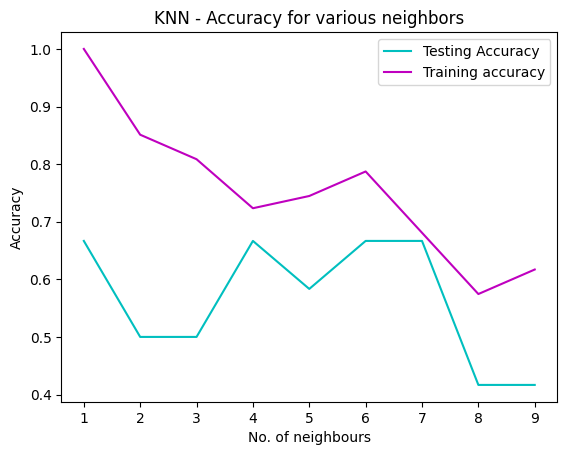

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.title('KNN - Accuracy for various neighbors')
plt.plot(neighbours, testing_accuracy, label = 'Testing Accuracy', color ='c')
plt.plot(neighbours, training_accuracy, label = 'Training accuracy', color ='m')
plt.legend()
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('knn - accuracy vs no of neighbours')

In [ ]:
# From the above graph, we can say that the best fit value for K is either 4 OR 6 OR 7. Going by the accuracy, consider 7

LOGISTIC REGRESSION



In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.42


In [ ]:

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
logreg=LogisticRegression(max_iter=10000, solver='liblinear')
logreg_cv=GridSearchCV(logreg,param_grid,cv=10, scoring = 'accuracy')
logreg_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


tuned hpyerparameters :(best parameters)  {'C': 100, 'penalty': 'l1'}
accuracy : 0.8350000000000002


In [ ]:
lr_tuned =LogisticRegression(C = 100, penalty='l1', max_iter=10000, solver='liblinear')

model_tuned = lr_tuned.fit(X_train, y_train)

y_tuned_pred = lr_tuned.predict(X_test)

In [ ]:
accuracy_tuned = accuracy_score(y_test, y_tuned_pred)

In [ ]:
print("Accuracy:", accuracy_tuned)

Accuracy: 0.5833333333333334
